#**CIC Data Visualization Project (Fall 2023)**
**By Scott Ren**

**Research Topic**

In this in-depth study, we delve into the dynamics of COVID-19's spread across the globe. The project focuses on dissecting the influence of varied national policies and cultural background on the trajectory of new cases, death rates, and active cases. By leveraging advanced data visualization techniques, we aim to uncover insightful patterns and draw meaningful conclusions about the pandemic's evolution and the effectiveness of different governmental strategies in curbing its impact.

In [ ]:
!pip install statsmodels
!pip install pandas statsmodels matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

url = 'https://raw.githubusercontent.com/STR666666/CIC-Dataset/main/full_grouped.csv'
df = pd.read_csv(url)
print(df)

             Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0      2020-01-22         Afghanistan          0       0          0       0   
1      2020-01-22             Albania          0       0          0       0   
2      2020-01-22             Algeria          0       0          0       0   
3      2020-01-22             Andorra          0       0          0       0   
4      2020-01-22              Angola          0       0          0       0   
...           ...                 ...        ...     ...        ...     ...   
35151  2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1691     483        833     375   
35154  2020-07-27              Zambia       4552     140       2815    1597   
35155  2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered        

In [ ]:
# Remove the 'Deaths' and 'Recovered' columns
df_filtered = df.drop(columns=['Deaths', 'Recovered'])

# Filter the dataframe to include only rows from the WHO regions of interest
regions_of_interest = ['Americas', 'Western Pacific', 'Europe']
df_filtered = df_filtered[df_filtered['WHO Region'].isin(regions_of_interest)]

print(df_filtered)

             Date       Country/Region  Confirmed  Active  New cases  \
1      2020-01-22              Albania          0       0          0   
3      2020-01-22              Andorra          0       0          0   
5      2020-01-22  Antigua and Barbuda          0       0          0   
6      2020-01-22            Argentina          0       0          0   
7      2020-01-22              Armenia          0       0          0   
...           ...                  ...        ...     ...        ...   
35146  2020-07-27       United Kingdom     301708  254427        688   
35147  2020-07-27              Uruguay       1202     216         10   
35148  2020-07-27           Uzbekistan      21209    9414        678   
35149  2020-07-27            Venezuela      15988    5883        525   
35150  2020-07-27              Vietnam        431      66         11   

       New deaths  New recovered       WHO Region  
1               0              0           Europe  
3               0              

#**Trend Analysis**

1.  I have developed a line plot to meticulously illustrate the progression of confirmed COVID-19 cases over time. This visual representation meticulously tracks the evolution of case numbers, offering a clear view of the longitudinal trends and patterns evident in the dataset.

2. I have included detailed graphs specifically for the United States, China, and Sweden. These countries were selected due to their distinct policy approaches and their representation of different continents, providing a diverse perspective on the trends in new cases. This comparative analysis offers valuable insights into how varying strategies may have influenced the pandemic's trajectory in different global regions

<ipython-input-104-a73a600875b0>:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



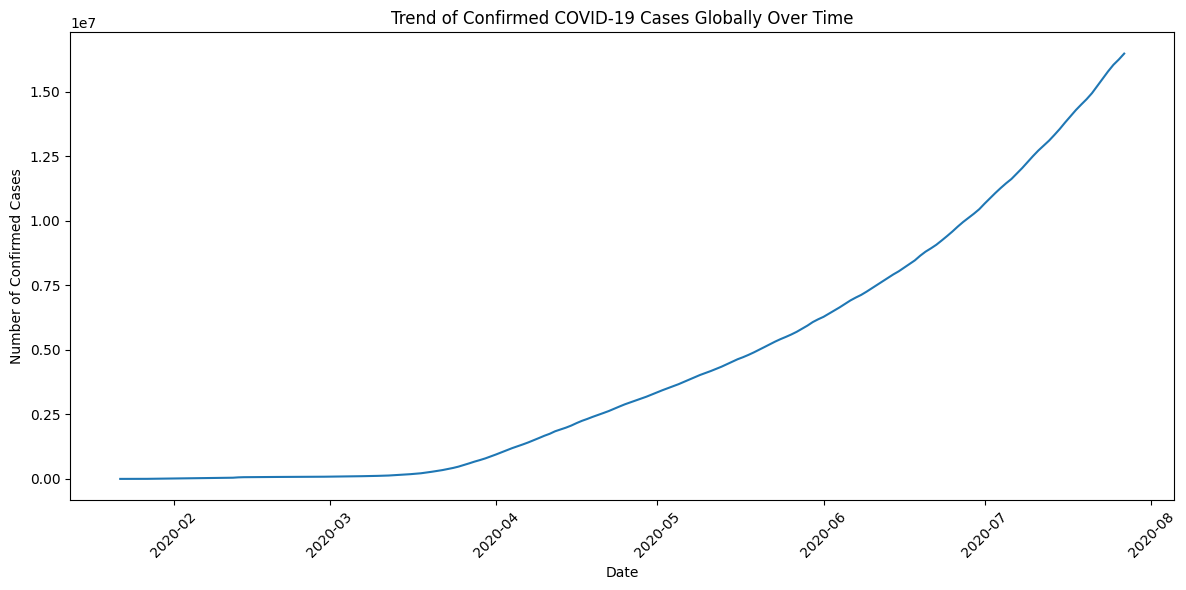

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Grouping by Date to aggregate the data for trend analysis
df_trend = df_filtered.groupby('Date').sum()

# Plotting the trend of Confirmed cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_trend.index, y=df_trend['Confirmed'])
plt.title('Trend of Confirmed COVID-19 Cases Globally Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<ipython-input-108-ed47ed50536c>:21: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-108-ed47ed50536c>:22: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-108-ed47ed50536c>:23: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



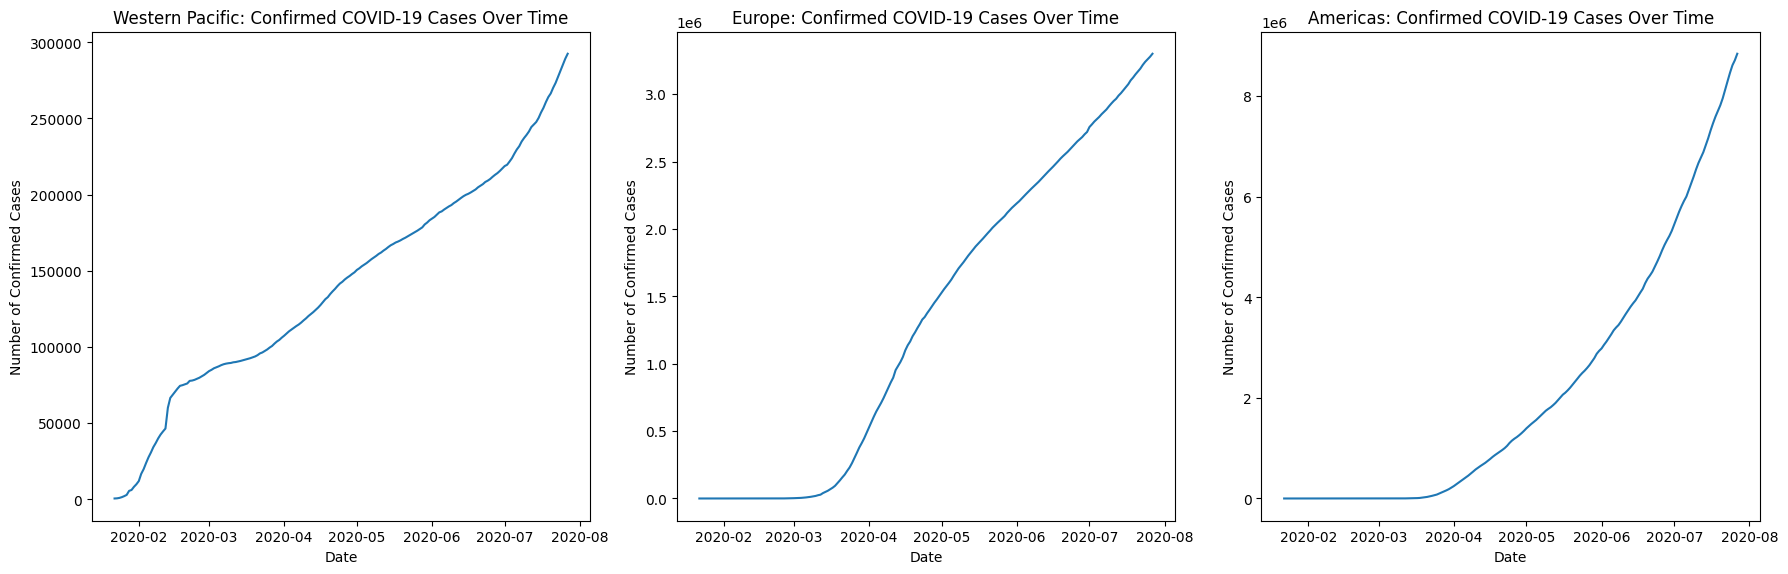

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Filter the data for each region according to WHO Regions
asia_data = df_filtered[df_filtered['WHO Region'] == 'Western Pacific']
europe_data = df_filtered[df_filtered['WHO Region'] == 'Europe']
america_data = df_filtered[df_filtered['WHO Region'] == 'Americas']  # This might include both North and South America

# Grouping by Date
asia_trend = asia_data.groupby('Date').sum()
europe_trend = europe_data.groupby('Date').sum()
america_trend = america_data.groupby('Date').sum()

# Plotting the trend of Confirmed cases over time for each continent
plt.figure(figsize=(18, 6))

# Western Pacific
plt.subplot(1, 3, 1)
sns.lineplot(x=asia_trend.index, y=asia_trend['Confirmed'])
plt.title('Western Pacific: Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')

# Europe
plt.subplot(1, 3, 2)
sns.lineplot(x=europe_trend.index, y=europe_trend['Confirmed'])
plt.title('Europe: Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')

# Americas
plt.subplot(1, 3, 3)
sns.lineplot(x=america_trend.index, y=america_trend['Confirmed'])
plt.title('Americas: Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')

plt.tight_layout()
plt.show()


All three regions continue to experience peaks, which is concerning. Notably, the Western Pacific region began its upward trend initially. This was followed by Europe and the Americas, which saw their case numbers rise two months later.


Since a comprehensive analysis of every country's policies is not feasible, we can instead focus on a select group of representative nations for a more targeted evaluation. By doing so, we'll be able to assess how variations in national strategies have influenced key metrics such as death rates, surges in new cases, and the number of active cases. This approach will enable us to draw meaningful comparisons and insights into the effectiveness of different policy responses to the pandemic.

# **China**

**Daily New COVID-19 Cases (2020)**

**Informal Policies/Cultural Background in China**

**Strict Lockdowns:** China implemented some of the world’s strictest lockdown measures, especially in Wuhan and Hubei province, including severe travel restrictions and quarantines.

**Mass Testing and Contact Tracing:** China rapidly scaled up testing and established an extensive contact tracing system.

**Centralized Response:** The response was highly centralized, with strong coordination across various levels of government.

**Mandatory Mask-Wearing:** Mask-wearing was widely enforced in public spaces.

**Use of Technology for Monitoring and Enforcement:** China employed technology, including mobile apps and big data, for tracking the spread of the virus and enforcing quarantine measures.

**Construction of Temporary Hospitals:** To handle the surge in COVID-19 cases, China quickly built temporary hospitals and converted existing spaces into medical facilities.

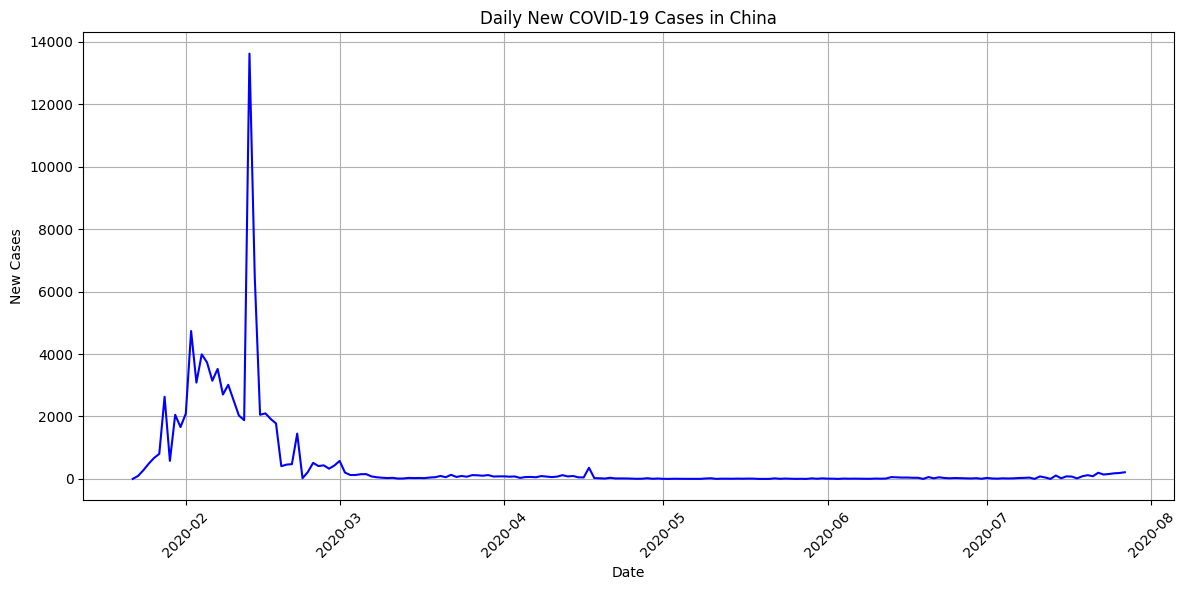

Date  New cases
183 2020-07-23        139
184 2020-07-24        157
185 2020-07-25        179
186 2020-07-26        189
187 2020-07-27        213

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for China
china_data = df_filtered[df_filtered['Country/Region'] == 'China']

# Group the data by date and sum the new cases for each date
china_daily_cases = china_data.groupby('Date')['New cases'].sum().reset_index()

# Plotting the new cases in China over time
plt.figure(figsize=(12, 6))
plt.plot(china_daily_cases['Date'], china_daily_cases['New cases'], color='blue')
plt.title('Daily New COVID-19 Cases in China')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Also, show the last few entries to understand the recent trend
china_daily_cases.tail()

The graph clearly illustrates a significant spike in the number of new COVID-19 cases during February and March, followed by a rapid decline. This trend aligns with the initial outbreak of COVID-19 in China, which led to widespread public concern and precautionary measures. The swift implementation of stringent policies in China, including the closure of businesses and public spaces, effectively reduced interpersonal contact. These measures played a crucial role in curbing the further spread of the virus, thereby controlling the escalation in new cases.

However, there might be other factors that affect on this spike displayed, such as data collection issues. But, personally, I remember this period as I lived in China through the pandemic.

**Daily New COVID-19 deaths (2020)**

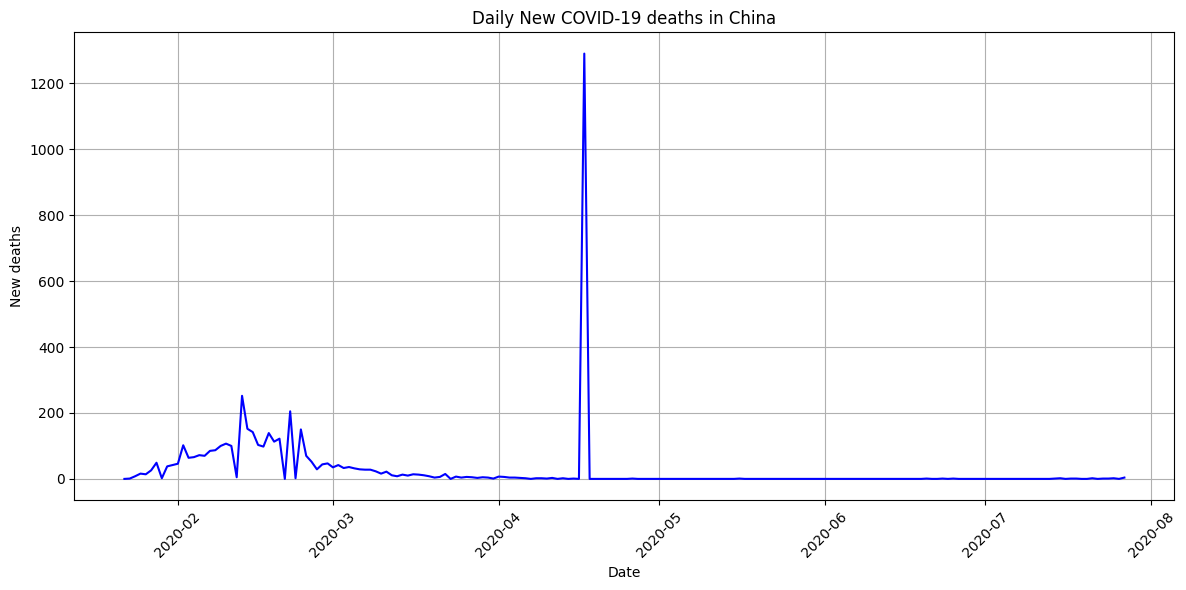

Date  New deaths
183 2020-07-23           1
184 2020-07-24           1
185 2020-07-25           2
186 2020-07-26           0
187 2020-07-27           4

In [ ]:
# Filter the data for China
china_data = df_filtered[df_filtered['Country/Region'] == 'China']

# Group the data by date and sum the new cases for each date
china_daily_cases = china_data.groupby('Date')['New deaths'].sum().reset_index()

# Plotting the new cases in China over time
plt.figure(figsize=(12, 6))
plt.plot(china_daily_cases['Date'], china_daily_cases['New deaths'], color='blue')
plt.title('Daily New COVID-19 deaths in China')
plt.xlabel('Date')
plt.ylabel('New deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Also, show the last few entries to understand the recent trend
china_daily_cases.tail()

The peak of the death rate occurs approximately two months following the outbreak's surge. Subsequently, the mortality rate becomes effectively managed. A major contributing factor to this control is China's implementation of restrictions on outdoor activities.

**Covid-19 Active**

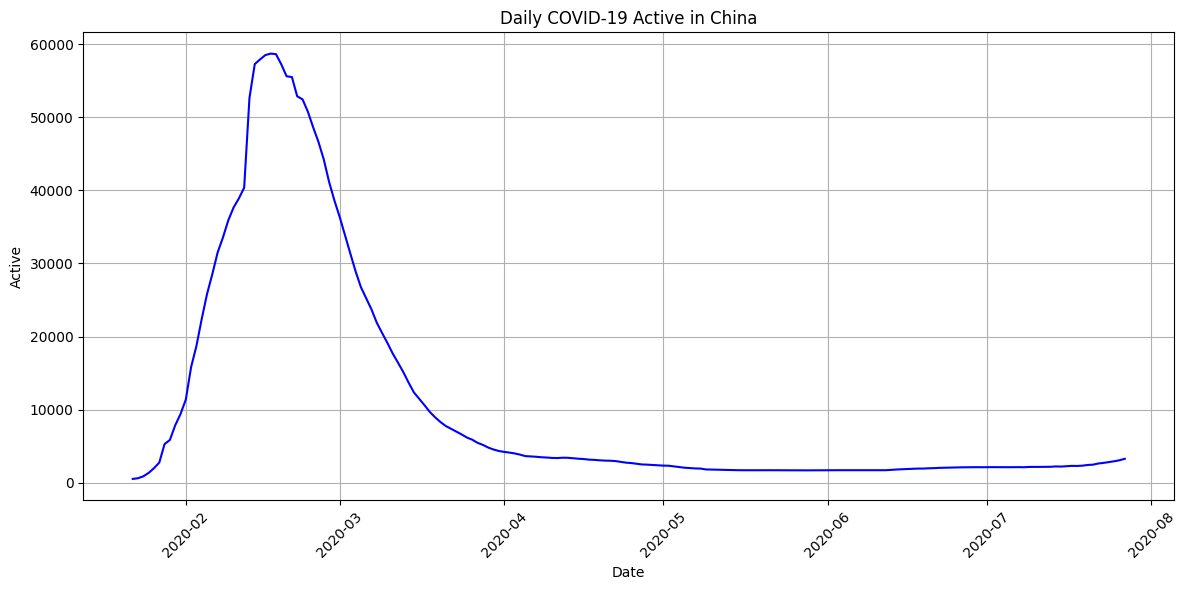

Date  Active
183 2020-07-23    2695
184 2020-07-24    2807
185 2020-07-25    2916
186 2020-07-26    3056
187 2020-07-27    3258

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for China
china_data = df_filtered[df_filtered['Country/Region'] == 'China']

# Group the data by date and sum the Active for each date

china_daily_cases = china_data.groupby('Date')['Active'].sum().reset_index()

# Plotting the Active in China over time
plt.figure(figsize=(12, 6))
plt.plot(china_daily_cases['Date'], china_daily_cases['Active'], color='blue')
plt.title('COVID-19 Active in China')
plt.xlabel('Date')
plt.ylabel('Active')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Also, show the last few entries to understand the recent trend
china_daily_cases.tail()

From this graph, we can tell that actives keep goes down after the peak.

# **US**

**Daily new COVID-19 Cases (2020)**

**Informal Policies/Cultural Background in US**

**Inconsistent Messaging:** There was mixed messaging at the federal level regarding the severity of the pandemic and appropriate safety measures.

**Decentralized Response:** The U.S. federal government delegated much of the decision-making to states, leading to a patchwork of different policies across the country.

**Varied State Measures:** Some states implemented strict stay-at-home orders and closed non-essential businesses, while others opted for more relaxed guidelines.

**Slow Ramp-Up of Testing:** The U.S. faced challenges in rolling out widespread testing, which affected early containment efforts.

**Economic Stimulus:** The government passed economic relief measures to mitigate the impact of the pandemic on businesses and individuals.

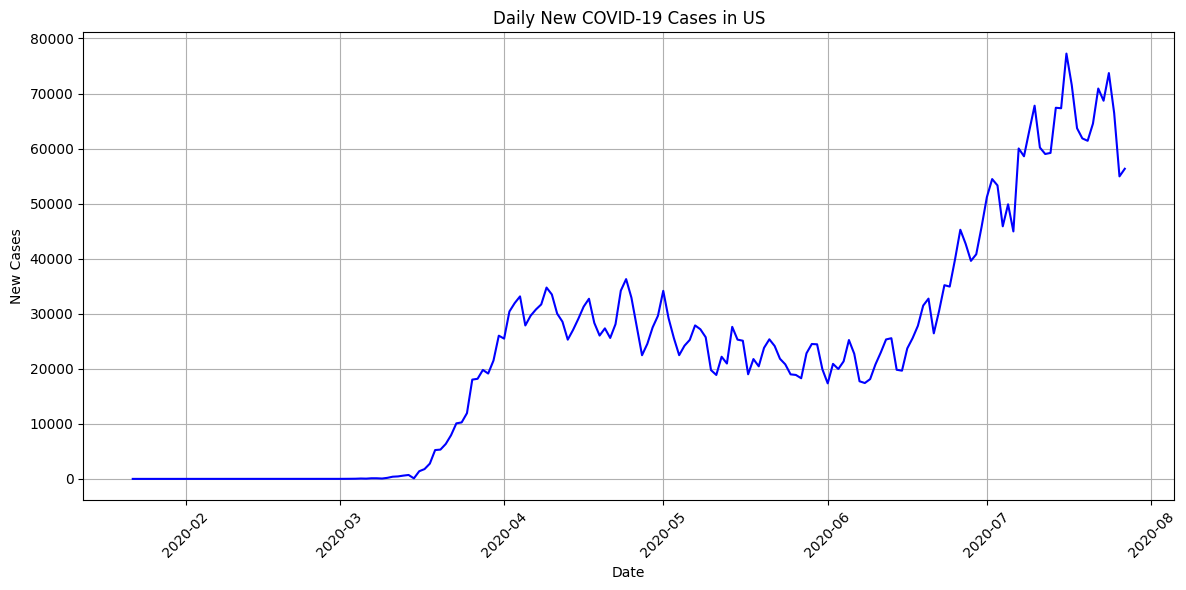

Date  New cases
183 2020-07-23      68695
184 2020-07-24      73715
185 2020-07-25      66439
186 2020-07-26      54953
187 2020-07-27      56336

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for US
US_data = df_filtered[df_filtered['Country/Region'] == 'US']

# Group the data by date and sum the new cases for each date
US_data = US_data.groupby('Date')['New cases'].sum().reset_index()

# Plotting the new cases in US over time
plt.figure(figsize=(12, 6))
plt.plot(US_data['Date'], US_data['New cases'], color='blue')
plt.title('Daily New COVID-19 Cases in US')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Also, show the last few entries to understand the recent trend
US_data.tail()

The graph displays multiple oscillations with an overall upward trajectory, which aligns closely with the U.S. policy landscape and the prevalent misinformation regarding the efficacy of mask-wearing and the risks associated with COVID-19. The American emphasis on personal freedom may have contributed to a less cautious approach to the pandemic, with individuals continuing to move about with relative liberty, a behavior that is reflected in the undulating yet rising pattern of new case numbers.

**Daily New COVID-19 deaths (2020)**

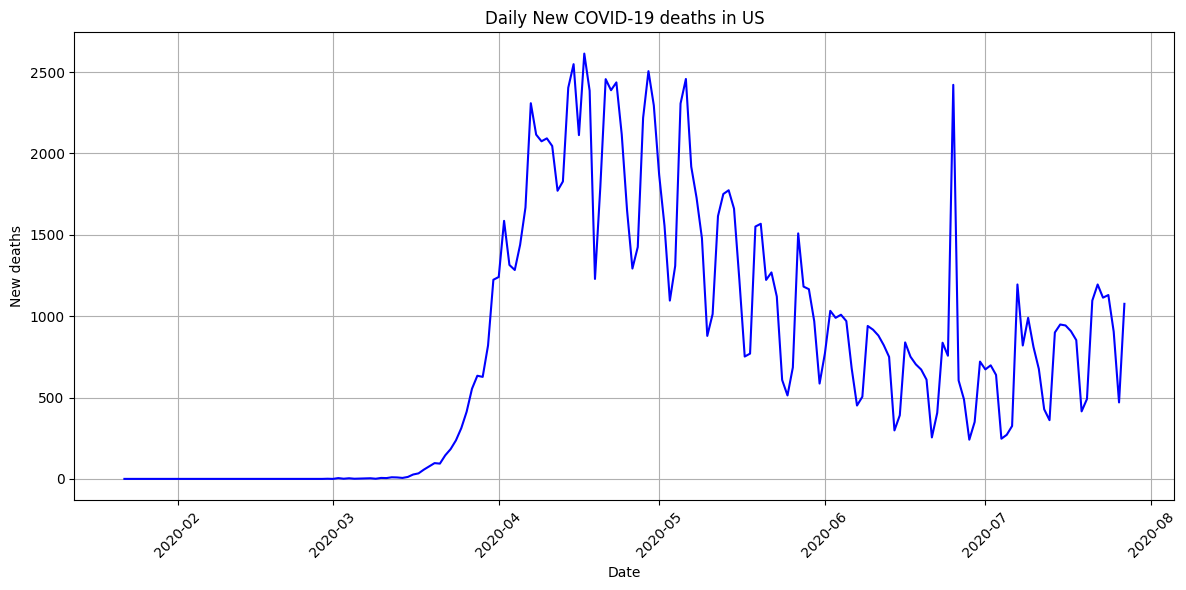

Date  New deaths
183 2020-07-23        1114
184 2020-07-24        1130
185 2020-07-25         905
186 2020-07-26         470
187 2020-07-27        1076

In [ ]:
# Filter the data for US
US_data = df_filtered[df_filtered['Country/Region'] == 'US']

# Group the data by date and sum the new cases for each date
US_data = US_data.groupby('Date')['New deaths'].sum().reset_index()

# Plotting the new cases in US over time
plt.figure(figsize=(12, 6))
plt.plot(US_data['Date'], US_data['New deaths'], color='blue')
plt.title('Daily New COVID-19 deaths in US')
plt.xlabel('Date')
plt.ylabel('New deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Also, show the last few entries to understand the recent trend
US_data.tail()

Though the bigger trend is moving down, but it moves slowley and there is still a big fluctuations on the death numbers between each day.

**Covid-19 Active**

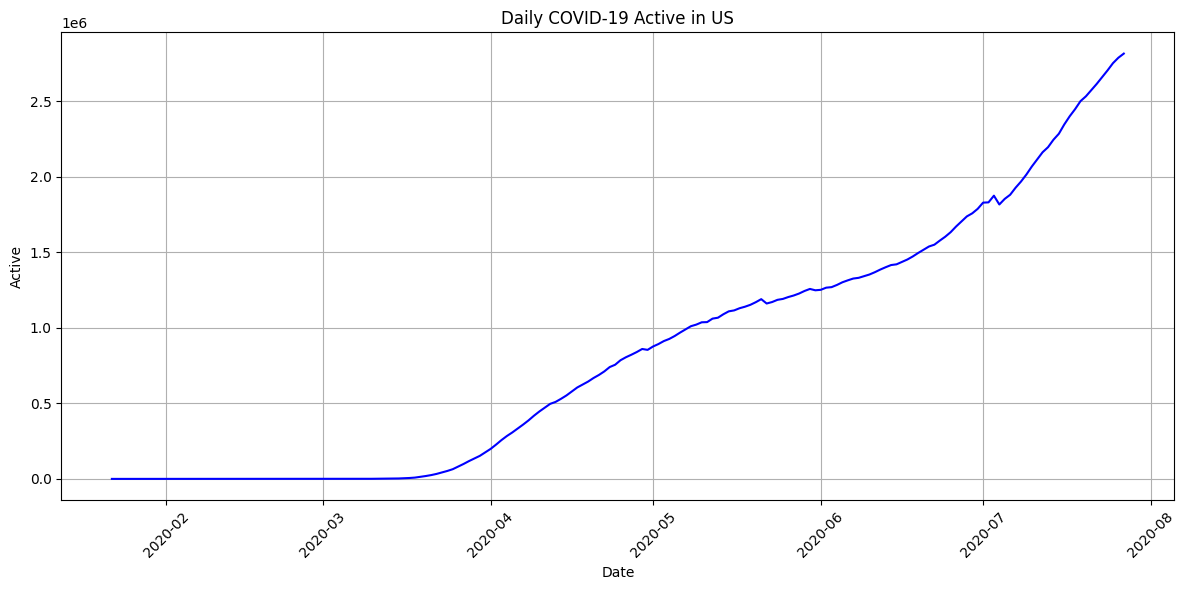

Date   Active
183 2020-07-23  2661117
184 2020-07-24  2705347
185 2020-07-25  2753091
186 2020-07-26  2789125
187 2020-07-27  2816444

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for US
US_data = df_filtered[df_filtered['Country/Region'] == 'US']

# Group the data by date and sum the Active for each date

US_data = US_data.groupby('Date')['Active'].sum().reset_index()

# Plotting the Active in US over time
plt.figure(figsize=(12, 6))
plt.plot(US_data['Date'], US_data['Active'], color='blue')
plt.title('Daily COVID-19 Active in US')
plt.xlabel('Date')
plt.ylabel('Active')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Also, show the last few entries to understand the recent trend
US_data.tail()

The upward trend suggests an acceleration in the number of new COVID-19 infections, outpacing recoveries and fatalities. This underscores the pressing requirement for policymakers to prioritize the health of the nation, given that the incidence of new cases is surpassing both recovery and mortality rates. Notice that the y-axis goes more than 10^6

# **Sweden**

**Daily New COVID-19 Cases (2020)**

**Informal Policies/Cultural Background in Sweden**

**Voluntary Measures:** Sweden largely relied on voluntary guidelines rather than mandatory lockdowns. Citizens were encouraged to practice social distancing, work from home, and avoid unnecessary travel, but these were not legally enforced.

**No School Closures:** Unlike many other countries, Sweden kept its schools open for children under the age of 16.
Limited Restrictions: Bars, restaurants, and most businesses remained open, albeit with some restrictions like reduced seating to encourage social distancing.

**Focus on Protecting High-Risk Groups:** There was an emphasis on protecting the elderly and other high-risk groups, though this aspect faced criticism due to high death rates in care homes.

**No Mandatory Mask Policy:** In the early stages, Sweden did not implement a widespread mask-wearing policy.

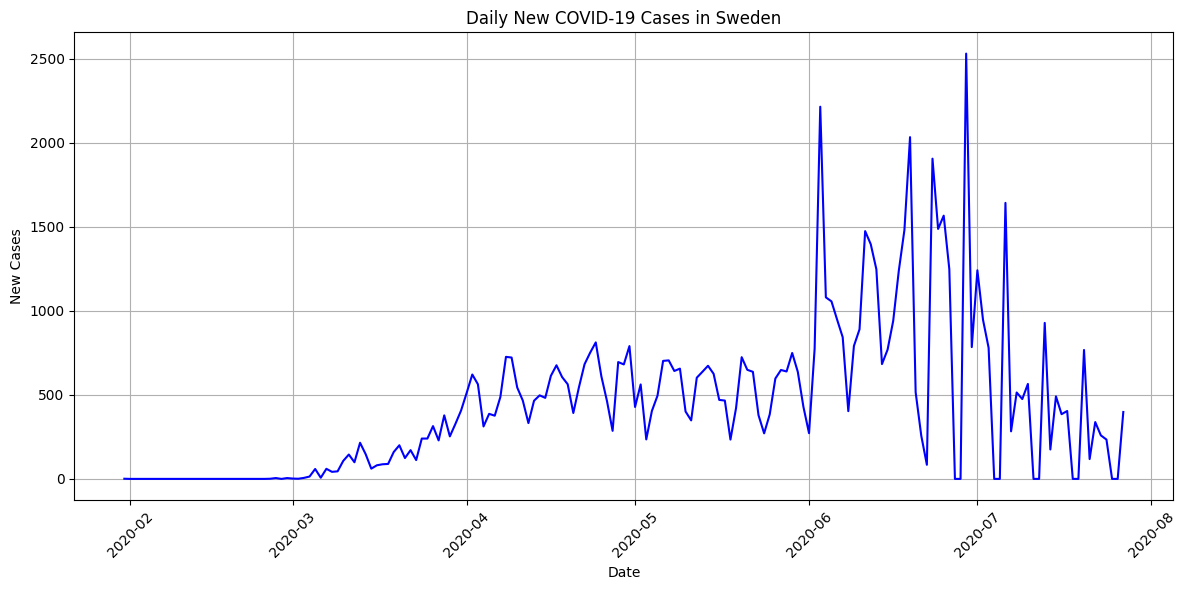

Date  New cases
174 2020-07-23        259
175 2020-07-24        234
176 2020-07-25          0
177 2020-07-26          0
178 2020-07-27        398

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for Sweden
sweden_data = df_filtered[df_filtered['Country/Region'] == 'Sweden']

# Group the data by date and sum the new cases for each date
sweden_data = sweden_data.groupby('Date')['New cases'].sum().reset_index()

# Plotting the new cases in Sweden over time
plt.figure(figsize=(12, 6))
plt.plot(sweden_data['Date'], sweden_data['New cases'], color='blue')
plt.title('Daily New COVID-19 Cases in Sweden')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Also, show the last few entries to understand the recent trend
sweden_data.tail()

The increase of new cases is maintained almost within 2500. Yet, it is fluctuating really hard. Sweden is in between US and China. It recommends people to take actions, but is not mandatory.

**Daily New COVID-19 deaths (2020)**

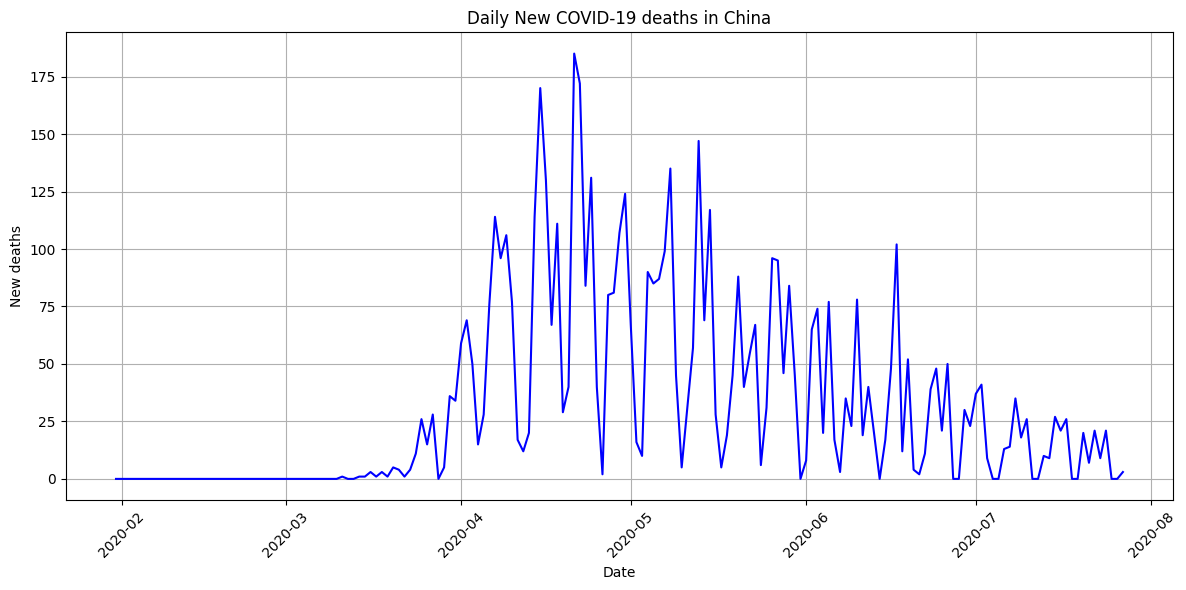

Date  New deaths
174 2020-07-23           9
175 2020-07-24          21
176 2020-07-25           0
177 2020-07-26           0
178 2020-07-27           3

In [ ]:
# Filter the data for Sweden
sweden_data = df_filtered[df_filtered['Country/Region'] == 'Sweden']

# Group the data by date and sum the new cases for each date
sweden_data = sweden_data.groupby('Date')['New deaths'].sum().reset_index()

# Plotting the new cases in Sweden over time
plt.figure(figsize=(12, 6))
plt.plot(china_daily_cases['Date'], china_daily_cases['New deaths'], color='blue')
plt.title('Daily New COVID-19 deaths in Sweden')
plt.xlabel('Date')
plt.ylabel('New deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Also, show the last few entries to understand the recent trend
sweden_data.tail()

The death can be seen to be fluctuating, but the y-axis is really small. That means, Sweden has been done a good job maintain the death cases across their country

**Covid-19 Active**

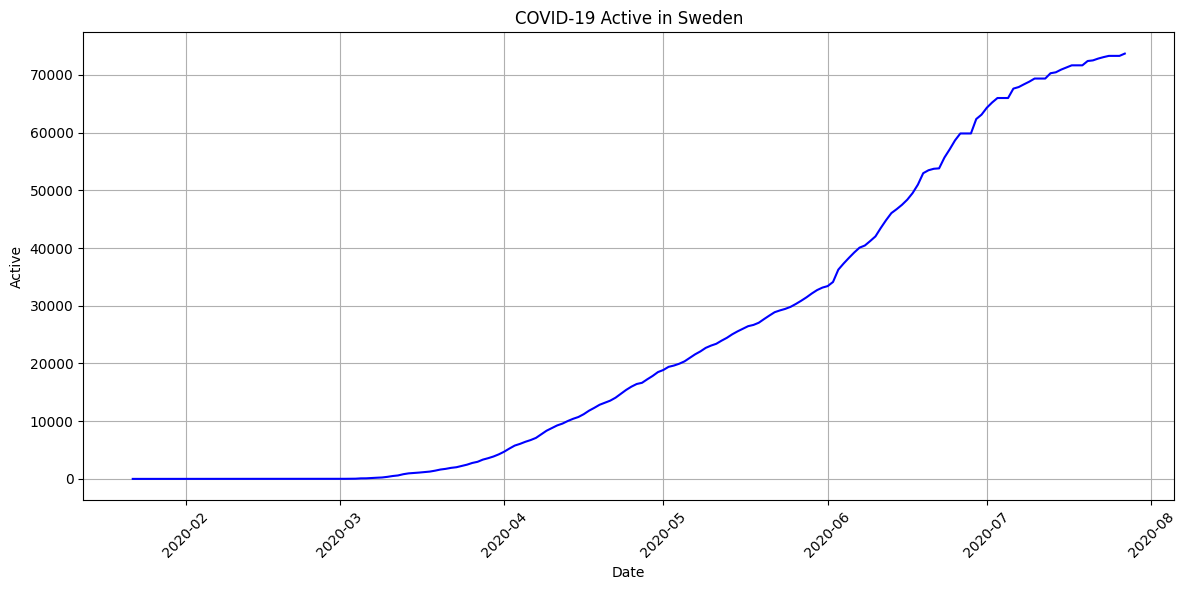

Date  Active
183 2020-07-23   73087
184 2020-07-24   73300
185 2020-07-25   73300
186 2020-07-26   73300
187 2020-07-27   73695

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for Sweden
sweden_data = df_filtered[df_filtered['Country/Region'] == 'Sweden']

# Group the data by date and sum the Active for each date

sweden_data = sweden_data.groupby('Date')['Active'].sum().reset_index()

# Plotting the Active in Sweden over time
plt.figure(figsize=(12, 6))
plt.plot(sweden_data['Date'], sweden_data['Active'], color='blue')
plt.title('COVID-19 Active in Sweden')
plt.xlabel('Date')
plt.ylabel('Active')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Also, show the last few entries to understand the recent trend
sweden_data.tail()

The active case count is increasing significantly. When considered alongside the graph of new cases, it can be inferred that the rates of recovery and death are relatively smaller compared to the rate of increase in new cases

**Comparison of the growth in New Cases between US, China, and Sweden**

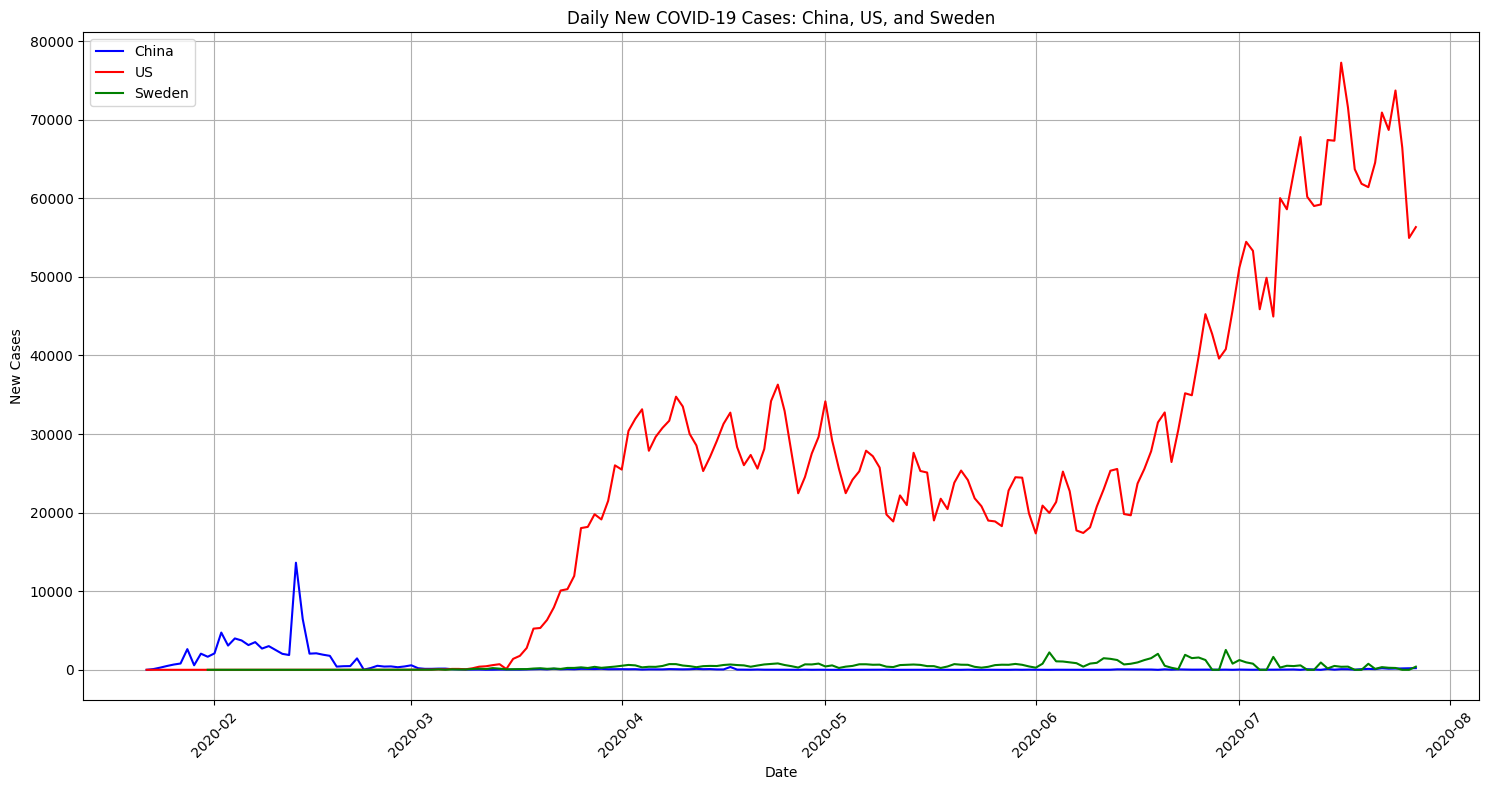

In [ ]:
# Filter the data for China, US, and Sweden
countries_to_compare = ['China', 'US', 'Sweden']
comparison_data = df_filtered[df_filtered['Country/Region'].isin(countries_to_compare)]

# Group the data by date and country, then sum the new cases for each date
comparison_daily_cases = comparison_data.groupby(['Date', 'Country/Region'])['New cases'].sum().reset_index()

# Pivoting the data for easier plotting
comparison_daily_cases_pivot = comparison_daily_cases.pivot(index='Date', columns='Country/Region', values='New cases')

# Plotting the new cases in China, US, and Sweden over time
plt.figure(figsize=(15, 8))
plt.plot(comparison_daily_cases_pivot.index, comparison_daily_cases_pivot['China'], label='China', color='blue')
plt.plot(comparison_daily_cases_pivot.index, comparison_daily_cases_pivot['US'], label='US', color='red')
plt.plot(comparison_daily_cases_pivot.index, comparison_daily_cases_pivot['Sweden'], label='Sweden', color='green')

plt.title('Daily New COVID-19 Cases: China, US, and Sweden')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

**Early Peak in China:** The graph shows an initial peak in China, where the pandemic began. The peak is followed by a rapid decline in new cases, reflecting the stringent containment measures and lockdowns implemented by the Chinese government early in the pandemic.

**Prolonged Surge in the US:** In contrast, the US shows a prolonged surge with multiple peaks of increasing intensity. This pattern may correlate with the more decentralized approach to the pandemic, where state-level policies varied widely, and there was inconsistent messaging on a national level about preventative measures.

**Low Case Count in Sweden:** Sweden’s line remains relatively flat and low compared to the US, indicating a much lower daily case count. Sweden's approach to the pandemic was notably different; for a long time, it refrained from imposing strict lockdowns, relying instead on voluntary measures and aiming for herd immunity.

**Policy and Cultural Influences:** The contrast between the trajectories of these three countries could be indicative of how national policies and cultural attitudes towards the pandemic influenced the spread of the virus. For instance, the US's emphasis on individual freedoms and a slower, state-by-state response may have contributed to the sustained high numbers of new cases. On the other hand, China's rapid and rigorous response may be reflected in the quick control of new cases.

**Comparison of the growth in New deaths between US, China, and Sweden**

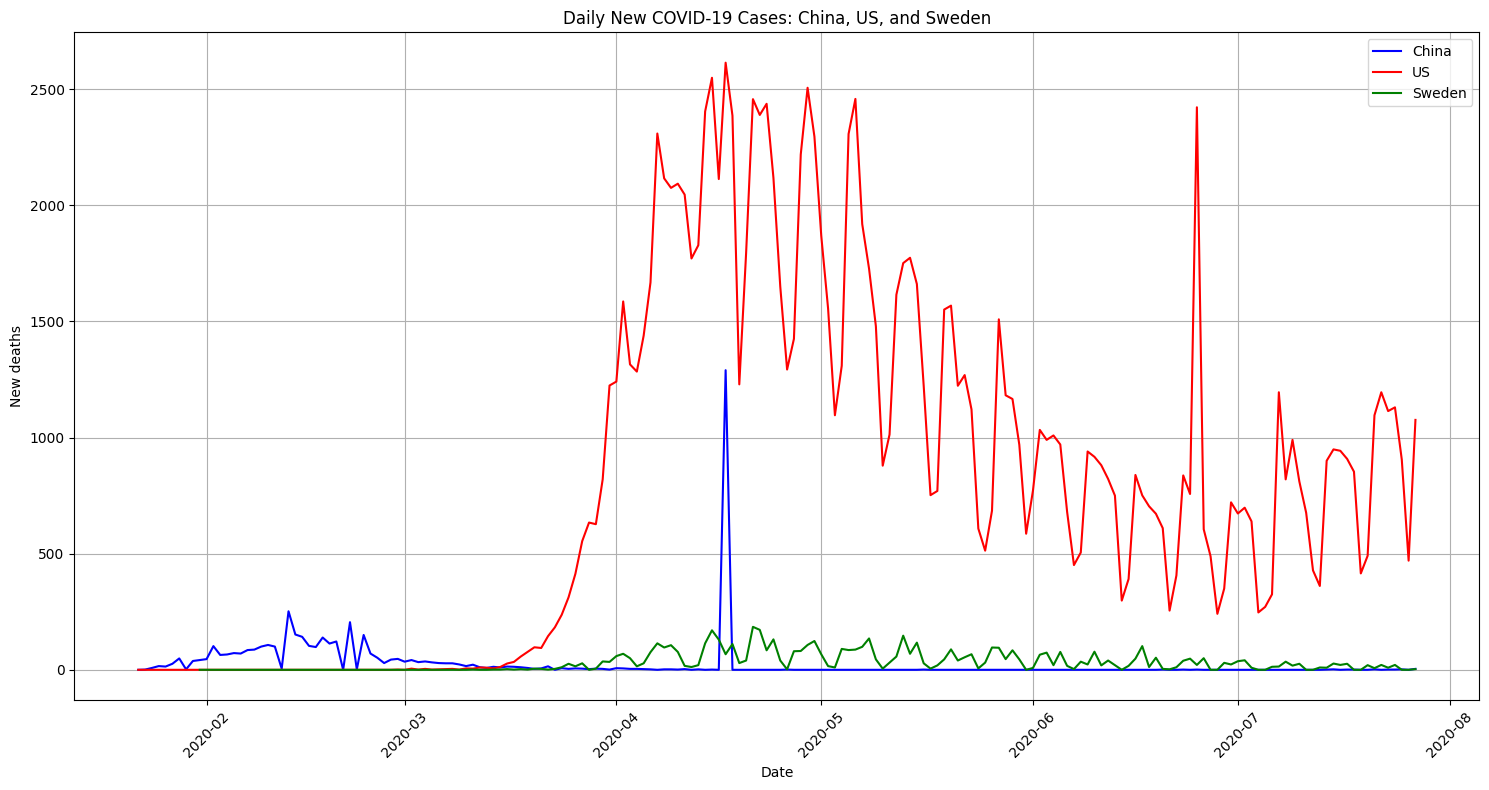

In [ ]:
# Filter the data for China, US, and Sweden
countries_to_compare = ['China', 'US', 'Sweden']
comparison_data = df_filtered[df_filtered['Country/Region'].isin(countries_to_compare)]

# Group the data by date and country, then sum the new deaths for each date
comparison_daily_cases = comparison_data.groupby(['Date', 'Country/Region'])['New deaths'].sum().reset_index()

# Pivoting the data for easier plotting
comparison_daily_cases_pivot = comparison_daily_cases.pivot(index='Date', columns='Country/Region', values='New deaths')

# Plotting the new deaths in China, US, and Sweden over time
plt.figure(figsize=(15, 8))
plt.plot(comparison_daily_cases_pivot.index, comparison_daily_cases_pivot['China'], label='China', color='blue')
plt.plot(comparison_daily_cases_pivot.index, comparison_daily_cases_pivot['US'], label='US', color='red')
plt.plot(comparison_daily_cases_pivot.index, comparison_daily_cases_pivot['Sweden'], label='Sweden', color='green')

plt.title('Daily New COVID-19 Cases: China, US, and Sweden')
plt.xlabel('Date')
plt.ylabel('New deaths')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

The graph illustrates the daily number of new COVID-19 related deaths in China, the US, and Sweden. It is evident from the data visualization that the United States experienced a significantly higher death rate when compared to China and Sweden during the observed time frame. This elevated death rate in the US can be associated with the larger volumes of COVID-19 infections in the country, as higher infection rates generally lead to more deaths. The graph's spikes in the US line indicate surges in fatalities, which could be a consequence of various factors including healthcare system capacity, the timing and effectiveness of public health interventions, and societal behaviors. In contrast, China and Sweden display relatively lower and more stable death rates over the same period. The data suggests that the extent of infections and subsequent management of the pandemic had a direct impact on the mortality rates observed in these countries.

The spike between April and May is a potential topic that we can furthur dive into.

#**Seasonal Analysis**

In [ ]:
# Function to plot seasonal component for a country
def plot_seasonal_component(country, ax):
    # Filter the data for the specified country
    country_data = df_filtered[df_filtered['Country/Region'] == country]
    country_data = country_data.set_index(pd.to_datetime(country_data['Date']))['New cases']

    # Decomposing the time series to observe the seasonal component
    decomposition = seasonal_decompose(country_data, model='additive', period=7)

    # Plotting the seasonal component
    ax.plot(decomposition.seasonal)
    ax.set_title(f'Seasonal Component of New Cases in {country}')
    ax.set_ylabel('New Cases')
    ax.set_xlabel('Date')

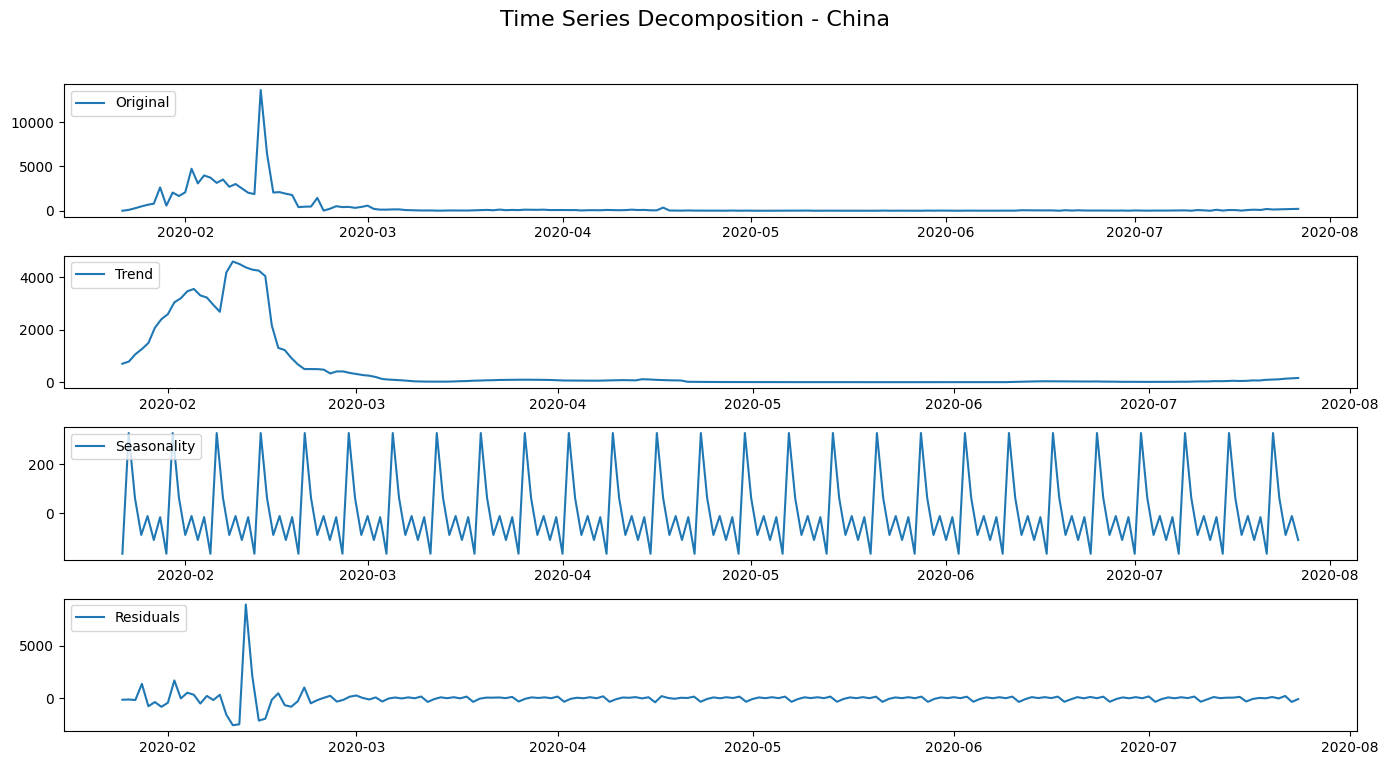

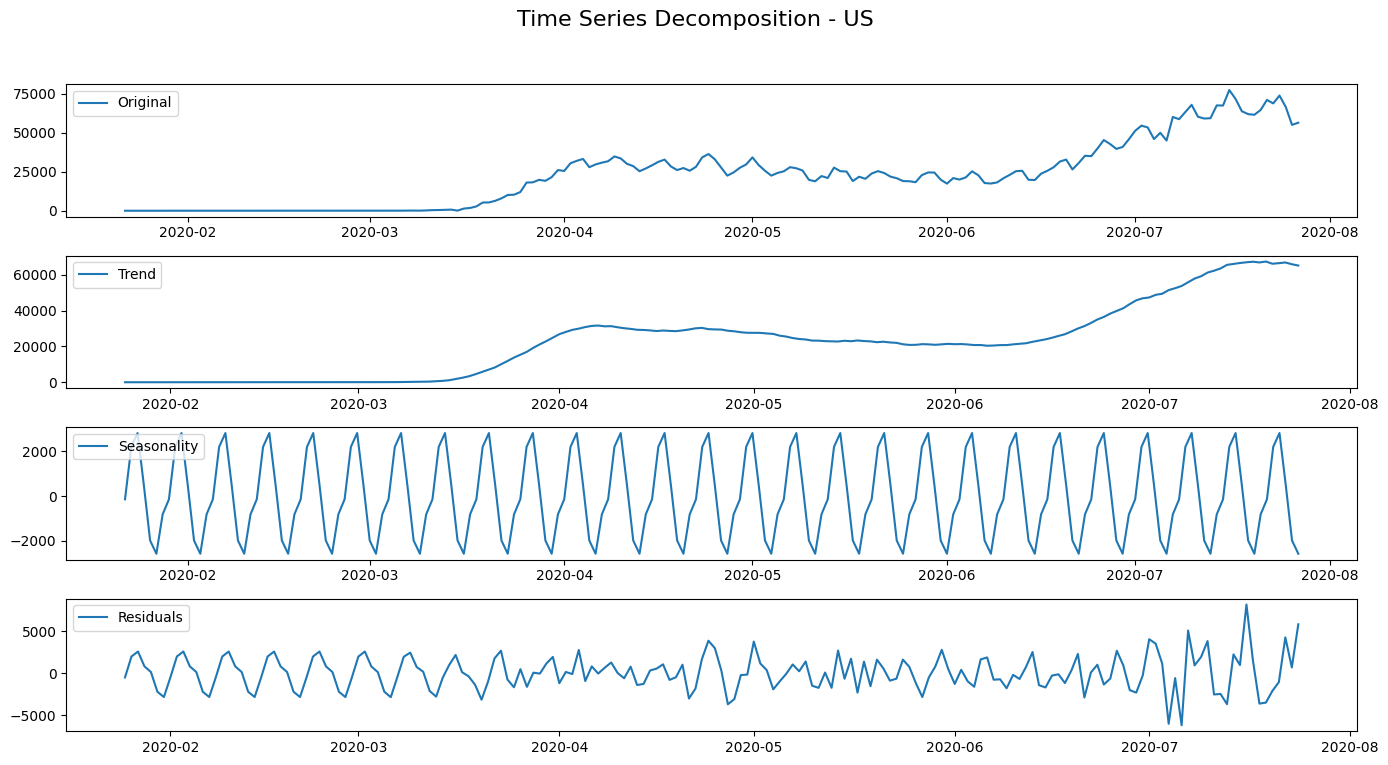

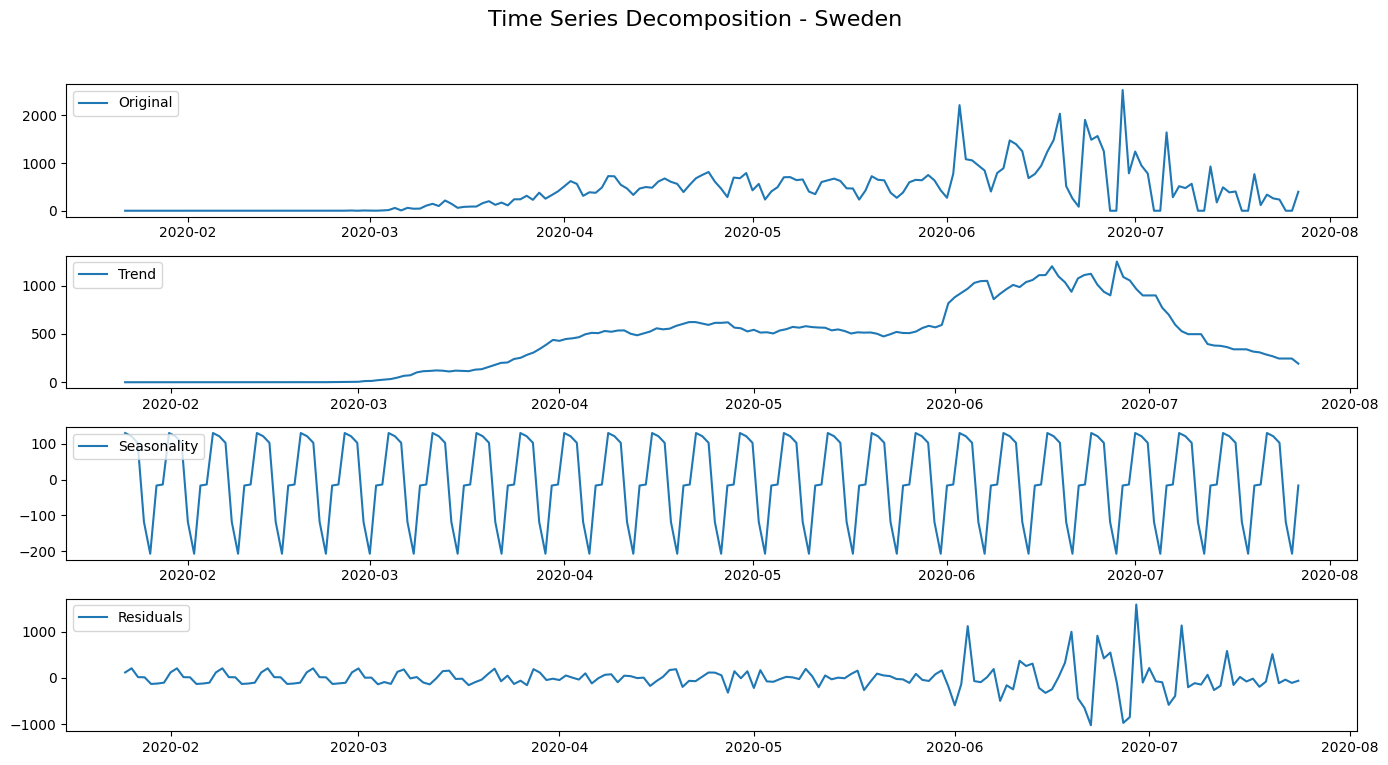

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Filtering the dataset for China, the US, and Sweden
china_data = df_filtered[df_filtered['Country/Region'] == 'China'].groupby('Date')['New cases'].sum()
us_data = df_filtered[df_filtered['Country/Region'] == 'US'].groupby('Date')['New cases'].sum()
sweden_data = df_filtered[df_filtered['Country/Region'] == 'Sweden'].groupby('Date')['New cases'].sum()

# Converting the index to datetime for each country
china_data.index = pd.to_datetime(china_data.index)
us_data.index = pd.to_datetime(us_data.index)
sweden_data.index = pd.to_datetime(sweden_data.index)

# Function to perform and plot time series decomposition
def plot_decomposition(country_name, country_data):
    decomposition = seasonal_decompose(country_data, model='additive', period=7)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(14, 8))
    plt.suptitle(f'Time Series Decomposition - {country_name}', fontsize=16)

    plt.subplot(411)
    plt.plot(country_data, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plotting the decomposition for China, the US, and Sweden
plot_decomposition('China', china_data)
plot_decomposition('US', us_data)
plot_decomposition('Sweden', sweden_data)


**Different Trajectories:** The time-series graphs demonstrate distinct trajectories of new COVID-19 cases in China, the US, and Sweden. This variation is likely reflective of the differing national policies and cultural backgrounds of these countries.

**Effectiveness of Governmental Strategies:**

1. **China:** The graph for China typically shows an early spike in cases followed by a rapid decline, which aligns with China's swift implementation of stringent lockdowns and strict public health measures.

2. **United States:** In contrast, the US graph may show a more prolonged or multiple peaks in cases, potentially indicating a different approach with varying degrees of lockdowns, mask mandates, and other public health measures across states.

3. **Sweden:** Sweden's graph is particularly interesting, as it might exhibit a different pattern due to their initially less restrictive approach, focusing on recommendations rather than enforced lockdowns, which could have led to different outcomes in case numbers.

**Cultural Factors:** The variance in the graphs also points to the influence of cultural factors. The compliance of populations with public health guidelines, social behaviors, and the general public response to government directives are all cultural aspects that significantly affect the spread of the virus.

# **Geospatial Analysis**

**Global Progression of Covid-19 over Time**

In [ ]:
import plotly.express as px
import pandas as pd

# Preparing the data
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
data_grouped = df_filtered.groupby(['Date', 'Country/Region'])['New cases'].sum().reset_index()

# Create the choropleth map
fig = px.choropleth(data_grouped,
                    locations="Country/Region",
                    locationmode='country names',
                    color="New cases",
                    hover_name="Country/Region",
                    animation_frame=data_grouped["Date"].dt.strftime('%Y-%m-%d'),
                    color_continuous_scale=px.colors.sequential.Plasma)

# Enhance the layout
fig.update_layout(title_text='Global Progression of New COVID-19 Cases Over Time',
                  geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))

# Show the figure
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Preparing the data for new deaths
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
data_grouped = df_filtered.groupby(['Date', 'Country/Region'])['New deaths'].sum().reset_index()

# Handling negative values: replacing negative values with 0 or a small positive number
data_grouped['New deaths'] = data_grouped['New deaths'].apply(lambda x: max(x, 0))

# Adding a column for the size of the bubbles
# Adjust the scale factor as needed
scale_factor = 100
data_grouped['Size'] = data_grouped['New deaths'] * scale_factor

# Create the bubble map
fig = px.scatter_geo(data_grouped,
                     locations="Country/Region",
                     locationmode='country names',
                     size="Size",
                     color="New deaths",
                     hover_name="Country/Region",
                     animation_frame=data_grouped["Date"].dt.strftime('%Y-%m-%d'),
                     color_continuous_scale=px.colors.sequential.Plasma,
                     projection="natural earth")

# Enhance the layout
fig.update_layout(title_text='Global Progression of New COVID-19 Deaths Over Time',
                  geo=dict(showframe=False, showcoastlines=False))

# Show the figure
fig.show()


**Global Progression of Covid-19 over Time in Europe, Americas, and Western Pacific**

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming 'covid_data' is your DataFrame with COVID-19 data
# Load your data here
# covid_data = pd.read_csv('path_to_your_data.csv')

# Filter the data for Europe, the Americas, and the Western Pacific
regions_to_include = ['Europe', 'Americas', 'Western Pacific']
df_filtered = df_filtered[df_filtered['WHO Region'].isin(regions_to_include)]

# Preparing the data
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
data_grouped = df_filtered.groupby(['Date', 'Country/Region', 'WHO Region'])['New cases'].sum().reset_index()

# Create the bubble map
fig = px.scatter_geo(data_grouped,
                     locations="Country/Region",
                     locationmode='country names',
                     size="New cases",
                     hover_name="Country/Region",
                     animation_frame=data_grouped["Date"].dt.strftime('%Y-%m-%d'),
                     color="WHO Region",
                     color_continuous_scale=px.colors.sequential.Plasma,
                     projection="natural earth")

# Enhance the layout
fig.update_layout(title_text='Progression of New COVID-19 Cases Over Time in Europe, Americas, and Western Pacific',
                  geo=dict(showframe=False, showcoastlines=True))

# Show the figure
fig.show()

This interactive visualization maps the escalation of new COVID-19 cases across the Americas, the Western Pacific, and Europe. The selection of the United States, China, and Sweden in earlier analyses was not arbitrary; these nations were chosen as representative case studies due to their distinct geographic locations, as well as their unique policy approaches and cultural attitudes toward the pandemic. The underlying hypothesis was that regional proximity might lead to similarities in policy responses and epidemiological trends. This assumption appears validated when we manipulate the timeline in the visualization: the Americas show a pronounced and growing number of new cases, particularly when compared to Sweden and China. Sweden's count remains relatively modest and consistent, reflecting its unique response strategy, which diverged from much of Europe. Meanwhile, the Western Pacific region, represented by China, exhibits very low numbers of new cases, likely a testament to the stringent measures implemented early in the outbreak. This geographic visualization supports the notion that regional policy and culture have a profound impact on the spread of the virus, with these three countries serving as microcosms for their respective regions' broader responses to the pandemic.

In [ ]:
regions_to_include = ['Europe', 'Americas', 'Western Pacific']
df_filtered = df_filtered[df_filtered['WHO Region'].isin(regions_to_include)]

# Preparing the data
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
data_grouped = df_filtered.groupby(['Date', 'Country/Region', 'WHO Region'])['New deaths'].sum().reset_index()

# Replace negative values with 0
data_grouped['New deaths'] = data_grouped['New deaths'].clip(lower=0)

# Create the bubble map
fig = px.scatter_geo(data_grouped,
                     locations="Country/Region",
                     locationmode='country names',
                     size="New deaths",
                     hover_name="Country/Region",
                     animation_frame=data_grouped["Date"].dt.strftime('%Y-%m-%d'),
                     color="WHO Region",
                     color_continuous_scale=px.colors.sequential.Plasma,
                     projection="natural earth")

# Enhance the layout
fig.update_layout(title_text='Progression of New COVID-19 Deaths Over Time in Europe, Americas, and Western Pacific',
                  geo=dict(showframe=False, showcoastlines=True))

# Show the figure
fig.show()


The same I have dicovered from in deaths over time in Europe, Americas, and Western Pacific